# 텐서플로우 기초
## 난수생성 (균일분포:uniform distribution (최솟값과 최대값사이의 모든 수가 나올 확률이 동일한 분포에서 수를 뽑는다는 뜻)

### https://www.tensorflow.org/api_docs/python/tf/random/uniform


In [2]:
import tensorflow as tf

In [14]:
#tf.random.set_seed(5)   #seed번호가 있으면 그 번호는 항상 같은 값이 나옴
rand=tf.random.uniform([1],0,1)  #균일분포로 난수를 생성하고 1차원 배열에 할당, 최솟값 0, 최대값 1
print(rand)

tf.Tensor([0.20179546], shape=(1,), dtype=float32)


In [25]:
rand=tf.random.normal([4],0,1) #정규분포(종모양의 분포성을 띔, 95%의 유값을 가짐), 4개값을 난수로구함, 평균이 0 이고 표준편차가 1로작성
print(rand)

tf.Tensor([-0.7101019   0.3560163  -0.07132571 -0.523514  ], shape=(4,), dtype=float32)


In [23]:
print("GPU 사용이 가능한가 : "),
print(tf.test.is_gpu_available())

print("텐서가 GPU #0에 있는가 : "),
print(rand.device.endswith('GPU:0'))

GPU 사용이 가능한가 : 
True
텐서가 GPU #0에 있는가 : 
True


## [선형회귀식 텐서플로우 실습]
## 신경망의 가장 기본적인 구성요소인 뉴런(퍼셉트론), 입력을 받아서 계산후 출력을 반환함
### 입력, 가중치, 활성화함수, 출력으로 구성됨
### 입력에 가중치를 곱한뒤(행렬곱셈) 활성화함수를 취하여 출력을 얻을수 있음
### 활성화함수는 시그모이드, 소프트맥스, ReLu함수등이 있음


99 a: 0.13692538 b: 6.4298005 loss: 94.95146


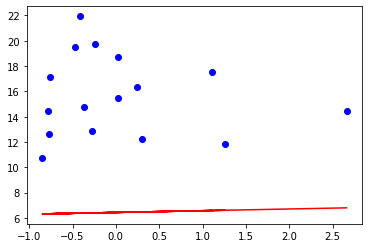

199 a: -0.1058372 b: 10.971152 loss: 31.80236


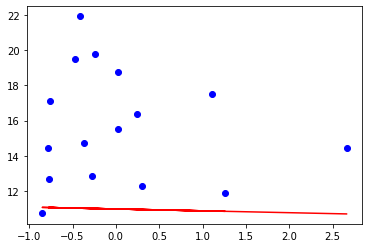

299 a: -0.24906318 b: 13.662572 loss: 13.798491


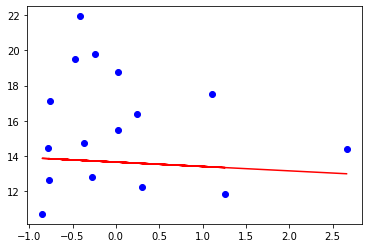

399 a: -0.3180596 b: 14.95934 loss: 10.283703


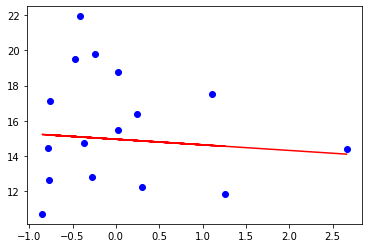

499 a: -0.34481934 b: 15.4622965 loss: 9.823563


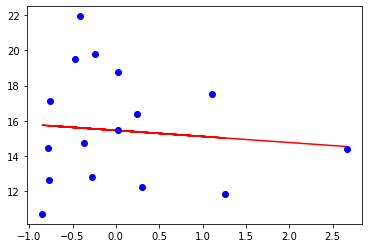

599 a: -0.3531975 b: 15.619763 loss: 9.783254


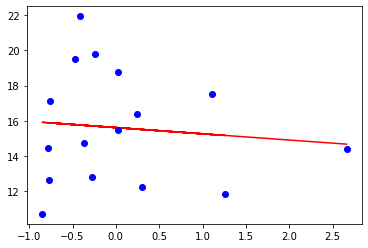

699 a: -0.3553197 b: 15.659649 loss: 9.780897


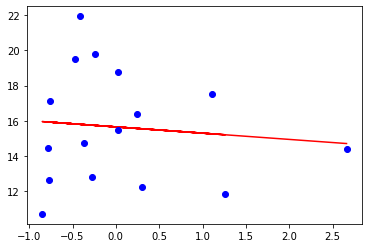

799 a: -0.3557528 b: 15.667793 loss: 9.780806


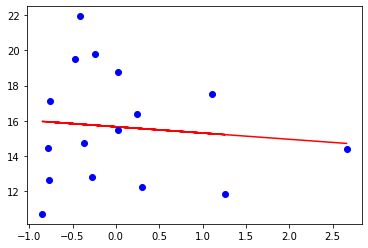

899 a: -0.3558239 b: 15.6691265 loss: 9.780803


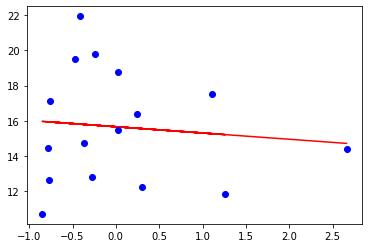

999 a: -0.3558334 b: 15.669302 loss: 9.780804


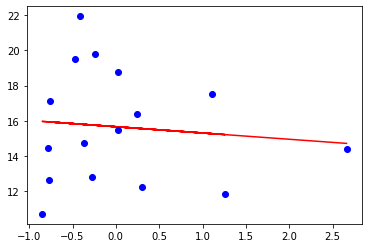

-------------- 최종 그래프 -------------


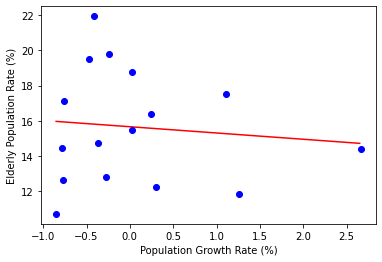

In [7]:

# 4.4 텐서플로를 이용해서 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)  #learningRage 값
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())
        plt.plot(X,a*X+b,'r-')
        plt.plot(X,Y,'bo')
        plt.show()

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b


print('-------------- 최종 그래프 -------------')
# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

In [ ]:
## [케라스를 이용한 선형회귀]


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# keras의 다차원 계층 모델인 Sequential를 레이어를 만든다.
model = tf.keras.models.Sequential()

# 입력이 1차원이고 출력이 1차원임을 뜻함 - Dense는 레이어의 종류
model.add(tf.keras.layers.Dense(1, input_dim = 1))

# Optimizer - Stochastic gradient descent - 확률적 경사 하강법
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)


# cost/loss funcion
# loss를 mean_squared_error 방식을 사용한다는 의미로 mse 라고 써도 인식한다.
model.compile(loss='mean_squared_error',optimizer=sgd)


#fit the line
# 텐서 플로우 1과 다르게 세션을 만들어서 돌릴 필요가 없다.
# 간단하게 만들어서 학습을 시작한다.
model.fit(X,Y, epochs=100)


Train on 16 samples
Epoch 1/100
16/16 [==============================] - 0s 9ms/sample - loss: 255.5032
Epoch 2/100
16/16 [==============================] - 0s 376us/sample - loss: 245.7485
Epoch 3/100
16/16 [==============================] - 0s 377us/sample - loss: 236.3817
Epoch 4/100
16/16 [==============================] - 0s 376us/sample - loss: 227.3872
Epoch 5/100
16/16 [==============================] - 0s 437us/sample - loss: 218.7503
Epoch 6/100
16/16 [==============================] - 0s 496us/sample - loss: 210.4567
Epoch 7/100
16/16 [==============================] - 0s 436us/sample - loss: 202.4927
Epoch 8/100
16/16 [==============================] - 0s 438us/sample - loss: 194.8452
Epoch 9/100
16/16 [==============================] - 0s 309us/sample - loss: 187.5017
Epoch 10/100
16/16 [==============================] - 0s 313us/sample - loss: 180.4500
Epoch 11/100
16/16 [==============================] - 0s 375us/sample - loss: 173.6786
Epoch 12/100
16/16 [==============

Epoch 96/100
16/16 [==============================] - 0s 312us/sample - loss: 15.0925
Epoch 97/100
16/16 [==============================] - 0s 375us/sample - loss: 14.8833
Epoch 98/100
16/16 [==============================] - 0s 373us/sample - loss: 14.6824
Epoch 99/100
16/16 [==============================] - 0s 373us/sample - loss: 14.4894
Epoch 100/100
16/16 [==============================] - 0s 436us/sample - loss: 14.3041


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    #  tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=6, input_shape=(1,)), 
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [2]:
model.predict(X) #값예측

array([[-0.06399238],
       [ 0.16638021],
       [-0.26876804],
       [-0.00639924],
       [-0.23677182],
       [-0.05119391],
       [ 0.05119391],
       [ 0.10025475],
       [ 0.16424711],
       [ 0.07892394],
       [ 0.18131177],
       [ 0.08745626],
       [ 0.05759315],
       [-0.00426616],
       [ 0.16211404],
       [-0.56739926]], dtype=float32)

### 텐서와 연산
### https://www.tensorflow.org/tutorials/customization/basics